# Import Libaraies

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

In [7]:
random_seed = 42
np.random.seed(random_seed)

In [8]:
#read the CSV file
df = pd.read_csv('psychomotor_dataset.csv',index_col=False)
df.head()

,Gender,Age,Family_ASD_History,Balance_and_Stability,Grip_Strength,Coordination,Hand_Eye_Coordination,Object_Manipulation,Independent_Use_Utensils,Button_Zip_Clothes,Psychomotor_Level
0,Female,8,No,Rarely,Maybe,Often,Rarely,Often,Maybe,Never Have,Moderate
1,Female,14,Yes,Always,Often,Rarely,Maybe,Maybe,Maybe,Never Have,Moderate
2,Female,10,No,Often,Maybe,Never Have,Rarely,Never Have,Never Have,Maybe,Severe
3,Male,14,No,Always,Never Have,Maybe,Often,Maybe,Often,Never Have,Moderate
4,Male,12,No,Always,Never Have,Rarely,Never Have,Rarely,Never Have,Never Have,Severe


In [9]:
#get the count of unique values in the Psychomotor_Level column
# This will give you the number of unique values in the column
df.Psychomotor_Level.value_counts()

Psychomotor_Level
Moderate    209
Mild        104
Severe       94
Name: count, dtype: int64

In [10]:
# Check for missing values
# This will give you the count of missing values in each column
df.isna().sum()

Gender                      0
Age                         0
Family_ASD_History          0
Balance_and_Stability       0
Grip_Strength               0
Coordination                0
Hand_Eye_Coordination       0
Object_Manipulation         0
Independent_Use_Utensils    0
Button_Zip_Clothes          0
Psychomotor_Level           0
dtype: int64

In [11]:
# Check the data types of the columns
print(df.dtypes)

Gender                      object
Age                          int64
Family_ASD_History          object
Balance_and_Stability       object
Grip_Strength               object
Coordination                object
Hand_Eye_Coordination       object
Object_Manipulation         object
Independent_Use_Utensils    object
Button_Zip_Clothes          object
Psychomotor_Level           object
dtype: object


## Data Analysis

### Expolitory Data Analysis

##### Univariate Analysis (Single Variable)

In [12]:
# 1. Descriptive statistics (mean, median, mode, standard deviation, etc.)
df.describe()

,Age
count,407.000000
mean,9.599509
std,2.878372
min,5.000000
25%,7.000000
50%,10.000000
75%,12.000000
max,14.000000


In [13]:
# 2. Frequency distributions (histograms, bar graphs, etc.)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20236\837906997.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Psychomotor_Level', palette="muted")


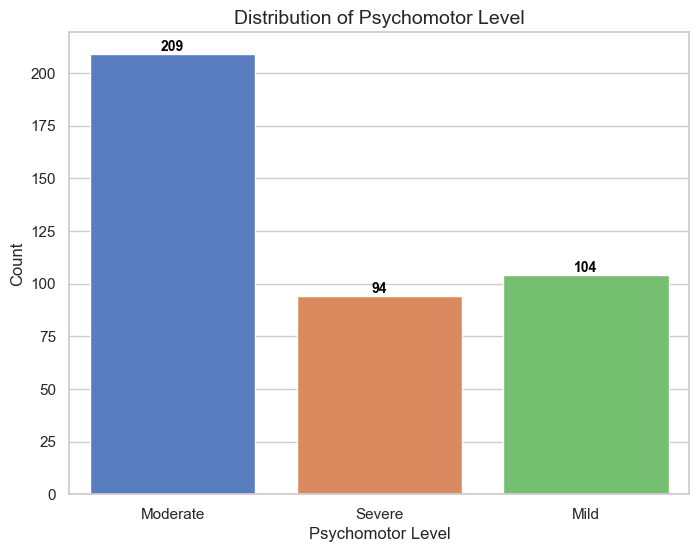

In [14]:
### plot the distribution of the Psychomotor_Level ###

# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create the count plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Psychomotor_Level', palette="muted")

# Annotate the count on top of the bars
for p in ax.patches:
    count = int(p.get_height())  # Get the height (count) of each bar
    ax.annotate(count, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Psychomotor Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Psychomotor Level', fontsize=14)

# Show the plot
plt.show()

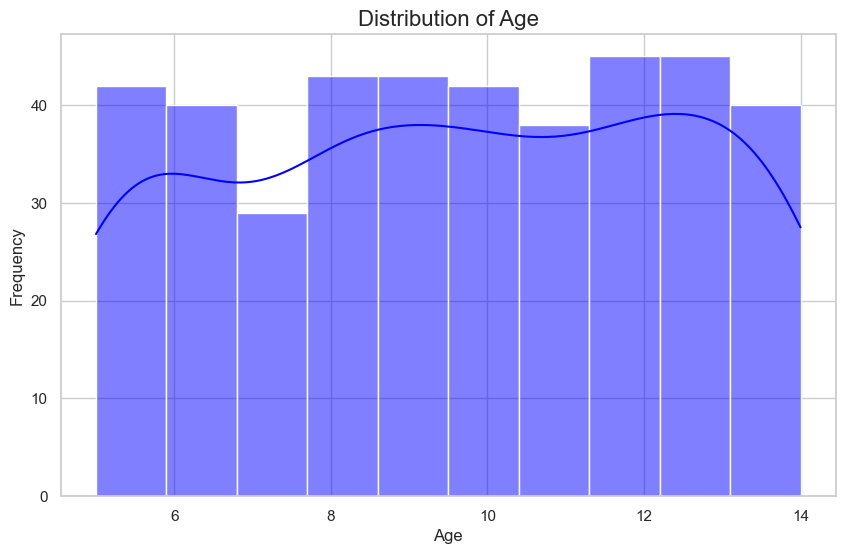

In [15]:
# Set style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of Ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.title("Distribution of Age", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

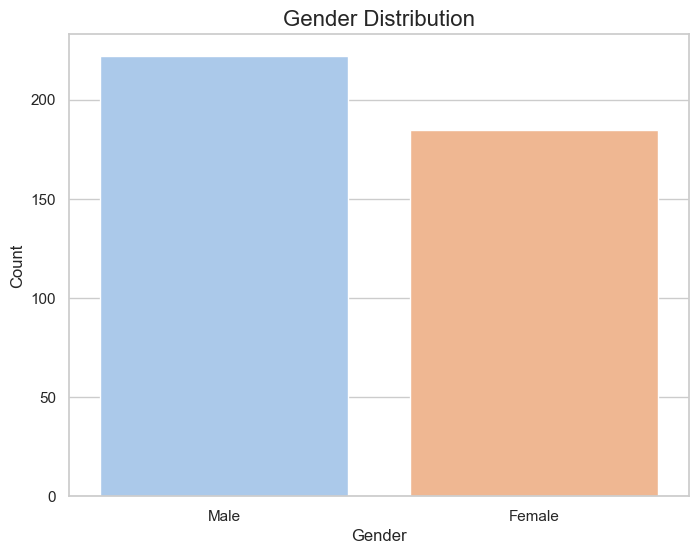

In [16]:
# 2. Gender Distribution
plt.figure(figsize=(8, 6))
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="pastel", hue=gender_counts.index, dodge=False)
plt.title("Gender Distribution", fontsize=16)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend([], [], frameon=False)  # Remove legend since it duplicates the x-axis
plt.show()

##### Bivariate Analysis (Two Variables)

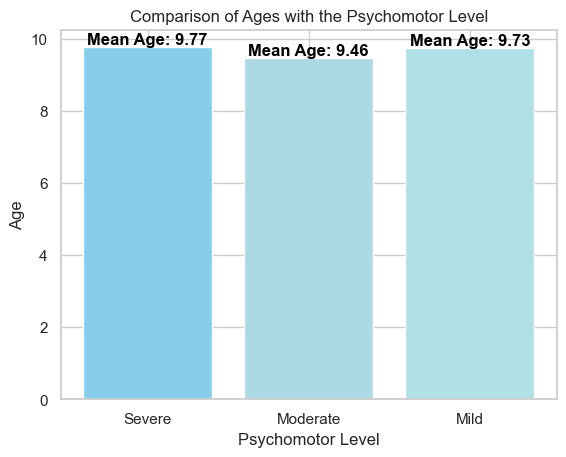

In [17]:
# Split the data into two groups: customers who took FD and those who didn't
fd_severe = df[df['Psychomotor_Level'] == 'Severe']['Age']
fd_moderate = df[df['Psychomotor_Level'] == 'Moderate']['Age']
fd_mild = df[df['Psychomotor_Level'] == 'Mild']['Age']

# Create a bar plot with soft colors
plt.bar(['Severe', 'Moderate', 'Mild'], 
        [fd_severe.mean(), fd_moderate.mean(), fd_mild.mean()], 
        color=['#87CEEB', '#ADD8E6', '#B0E0E6'])  # Soft colors: SkyBlue, LightBlue, PowderBlue

# Add labels to the bars
plt.text(0, fd_severe.mean(), f'Mean Age: {fd_severe.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(1, fd_moderate.mean(), f'Mean Age: {fd_moderate.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')
plt.text(2, fd_mild.mean(), f'Mean Age: {fd_mild.mean():.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

# Add labels and title
plt.xlabel('Psychomotor Level')
plt.ylabel('Age')
plt.title('Comparison of Ages with the Psychomotor Level')

# Show the plot
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_20236\1464024491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Psychomotor_Level', y='Age', palette="pastel")


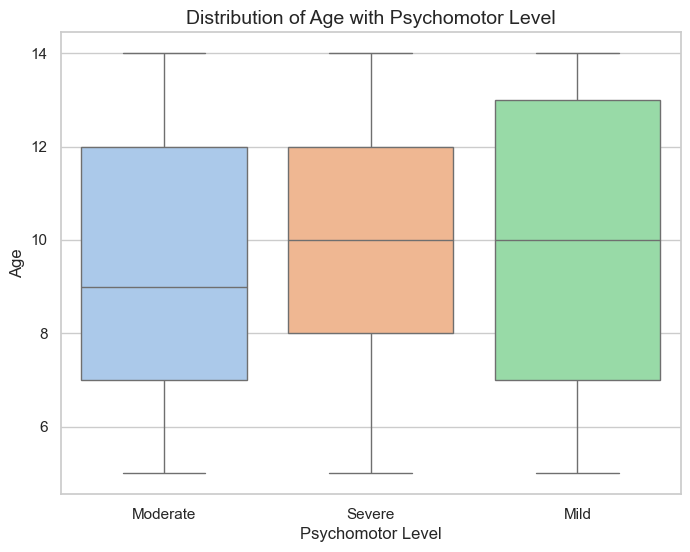

In [18]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Psychomotor_Level', y='Age', palette="pastel")

# Add labels and title
plt.xlabel('Psychomotor Level', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Distribution of Age with Psychomotor Level', fontsize=14)

# Show the plot
plt.show()

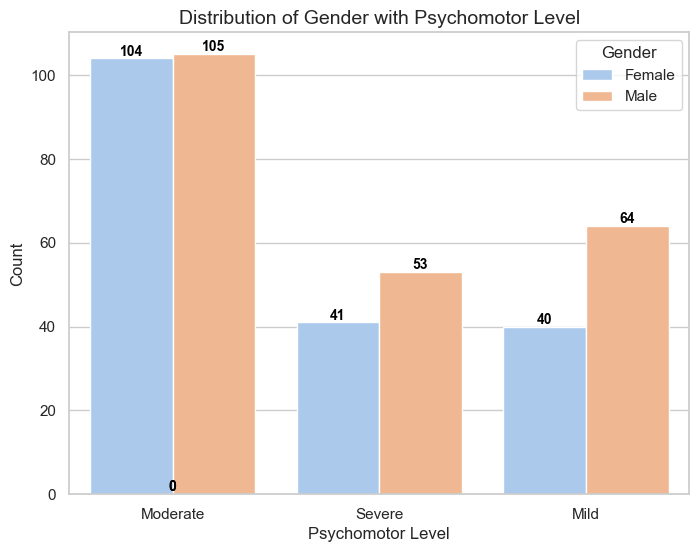

In [19]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Psychomotor_Level', hue='Gender', palette="pastel")

# Annotate the count on top of the bars
for p in ax.patches:
    count = int(p.get_height())  # Get the height (count) of each bar
    ax.annotate(count, (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add labels and title
plt.xlabel('Psychomotor Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Gender with Psychomotor Level', fontsize=14)
plt.legend(title='Gender')

# Show the plot
plt.show()

# Encoding

In [20]:
# Encode categorical variables
# This will convert categorical variables to numerical values
mappings = {
    "Gender": {"Male": 1, "Female": 0},
    "Family_ASD_History": {"Yes": 1, "No": 0},
    "Balance_and_Stability": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Grip_Strength": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Coordination": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Hand_Eye_Coordination": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Object_Manipulation": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Independent_Use_Utensils": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},
    "Button_Zip_Clothes": {"Never Have": 1, "Rarely": 2, "Maybe": 3, "Often": 4, "Always": 5},  
    "Psychomotor_Level": {"Mild": 0, "Moderate": 1, "Severe": 2}
}

# Map features to numerical values
for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = df[column].map(mapping)

df


,Gender,Age,Family_ASD_History,Balance_and_Stability,Grip_Strength,Coordination,Hand_Eye_Coordination,Object_Manipulation,Independent_Use_Utensils,Button_Zip_Clothes,Psychomotor_Level
0,0,8,0,2,3,4,2,4,3,1,1
1,0,14,1,5,4,2,3,3,3,1,1
2,0,10,0,4,3,1,2,1,1,3,2
3,1,14,0,5,1,3,4,3,4,1,1
4,1,12,0,5,1,2,1,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
402,0,5,0,3,4,2,3,3,3,3,1
403,1,11,1,1,3,2,2,3,2,3,1
404,1,14,1,3,2,3,3,4,3,4,1
405,1,14,1,3,3,2,3,4,3,4,0


#### Multivariate Analysis (More Than Two Variables)

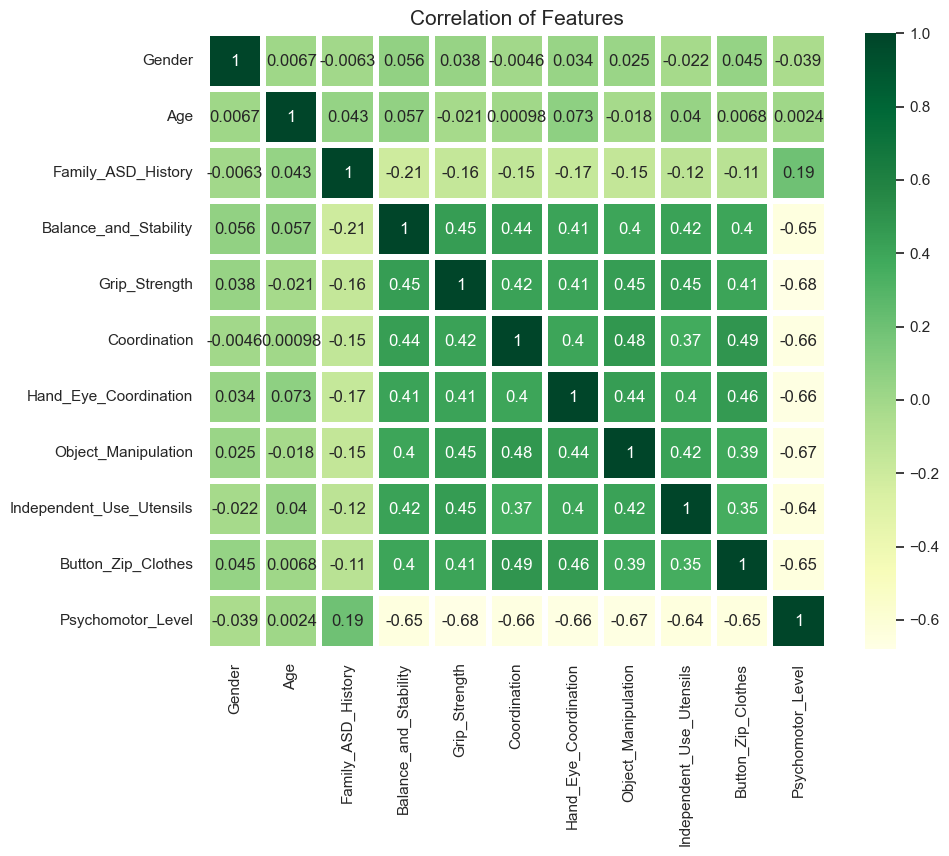

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the plot size by specifying figsize
fig, ax = plt.subplots(figsize=(10, 8))

# Create a heatmap
sns.heatmap(df.corr(),ax=ax, annot=True,linewidth=3 ,cmap="YlGn")

#plot title
plt.title("Correlation of Features", size=15, y=1)

# Show the plot
plt.show()

In [22]:
#Sorting correlation values in descending order by Psychomotor_Level attribute
df.corr()["Psychomotor_Level"].sort_values(ascending=False)

Psychomotor_Level           1.000000
Family_ASD_History          0.194563
Age                         0.002446
Gender                     -0.039256
Independent_Use_Utensils   -0.644990
Button_Zip_Clothes         -0.646151
Balance_and_Stability      -0.649932
Coordination               -0.659418
Hand_Eye_Coordination      -0.661476
Object_Manipulation        -0.667127
Grip_Strength              -0.680338
Name: Psychomotor_Level, dtype: float64

In [23]:
#Removing highly correlated features

#create positive correlation matrix
corr_df = df.corr().abs()

#select upper tringle of correlation matrix
mask = np.triu(np.ones_like(corr_df, dtype=bool))
tri_df = corr_df.mask(mask)

tri_df


,Gender,Age,Family_ASD_History,Balance_and_Stability,Grip_Strength,Coordination,Hand_Eye_Coordination,Object_Manipulation,Independent_Use_Utensils,Button_Zip_Clothes,Psychomotor_Level
Gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.006710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_ASD_History,0.006326,0.042509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Balance_and_Stability,0.055524,0.056624,0.207601,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grip_Strength,0.038274,0.021146,0.158514,0.447644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Coordination,0.004594,0.000978,0.147640,0.437407,0.416347,NaN,NaN,NaN,NaN,NaN,NaN
Hand_Eye_Coordination,0.033620,0.072651,0.167850,0.412645,0.411602,0.397343,NaN,NaN,NaN,NaN,NaN
Object_Manipulation,0.025102,0.017609,0.153838,0.400036,0.445107,0.475384,0.443092,NaN,NaN,NaN,NaN
Independent_Use_Utensils,0.021766,0.040374,0.117976,0.418853,0.449207,0.367238,0.397574,0.421802,NaN,NaN,NaN
Button_Zip_Clothes,0.044674,0.006797,0.107495,0.398189,0.405732,0.488010,0.456715,0.385978,0.35397,NaN,NaN


In [24]:
#Find index of features columns with correlation greater then 0.95
to_drop = [column for column in tri_df.columns if any (tri_df[column] > 0.95)]
print(); print(to_drop)


[]


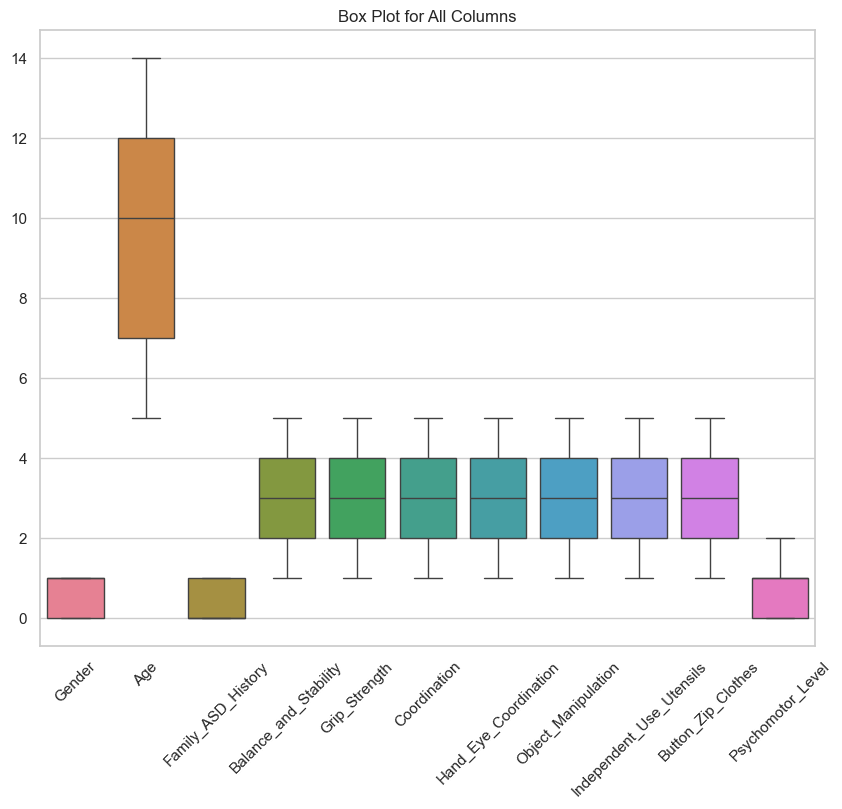

In [25]:
#Find outliers
# Create a box plot for all numerical columns in the dataset
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title('Box Plot for All Columns')
plt.xticks(rotation=45)  # Rotate column names for better readability
plt.show()

In [26]:
X = df.drop("Psychomotor_Level", axis=1)  # Features
y = df["Psychomotor_Level"]  # Target variable

In [27]:
# Split the Data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13, stratify=y)

# Print sizes to verify
print(f"Train size: {len(y_train)}")
print(f"Test size: {len(y_test)}")

Train size: 284
Test size: 123


In [28]:
y_train.value_counts()

Psychomotor_Level
1    146
0     72
2     66
Name: count, dtype: int64

In [29]:
y_test.value_counts()

Psychomotor_Level
1    63
0    32
2    28
Name: count, dtype: int64

### Model Training and Evaluation ###
##### Before SMOTE #####

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Initialize the base BaggingClassifier with the correct 'estimator' parameter
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Specify the number of cross-validation folds
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'estimator__max_depth': list(range(5, 26)),  # max_depth values from 5 to 25
    'estimator__min_samples_split': list(range(2, 16)),  # min_samples_split values from 2 to 15
    'estimator__min_samples_leaf': list(range(1, 11)),  # min_samples_leaf values from 1 to 10
    'n_estimators': list(range(50, 201, 50)),  # n_estimators values: 50, 100, 150, 200
    'max_samples': [x / 10 for x in range(6, 11)],  # max_samples values from 0.6 to 1.0
    'max_features': [x / 10 for x in range(6, 11)],  # max_features values from 0.6 to 1.0
    'bootstrap': [True, False]  # bootstrap options
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random combinations to try
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Extract parameters for the base estimator (DecisionTreeClassifier)
base_estimator_params = {
    'max_depth': best_params.pop('estimator__max_depth'),
    'min_samples_split': best_params.pop('estimator__min_samples_split'),
    'min_samples_leaf': best_params.pop('estimator__min_samples_leaf'),
}

# Initialize the base DecisionTreeClassifier with the best parameters
base_estimator = DecisionTreeClassifier(**base_estimator_params, random_state=42)

# Initialize the optimized BaggingClassifier with the best parameters
optimized_bagging_model = BaggingClassifier(estimator=base_estimator, **best_params, random_state=42)

# Perform K-fold cross-validation to evaluate the optimized model
scores = cross_val_score(optimized_bagging_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i + 1}: {score:.6f}")

# Calculate and print mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Best Hyperparameters: {'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.7, 'estimator__min_samples_split': 4, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 22, 'bootstrap': True}
Cross-Validation Accuracy Scores:
Fold 1: 0.982456
Fold 2: 0.894737
Fold 3: 0.912281
Fold 4: 0.964912
Fold 5: 0.982143
Mean Accuracy: 0.947306
Standard Deviation: 0.036741


In [31]:
# Fit model for train set
optimized_bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=22,
                                                   min_samples_leaf=2,
                                                   min_samples_split=4,
                                                   random_state=42),
                  max_features=0.7, max_samples=0.8, n_estimators=100,
                  random_state=42)

In [32]:
# Training accuracy
bc_train_accuracy = optimized_bagging_model.score(X_train, y_train)
print(f"Training Accuracy: {bc_train_accuracy:.6f}")

# Test accuracy
bc_test_accuracy = optimized_bagging_model.score(X_test, y_test)
print(f"Test Accuracy: {bc_test_accuracy:.6f}")

Training Accuracy: 0.989437
Test Accuracy: 0.926829


In [33]:
# Calculate training error
bc_train_pred = optimized_bagging_model.predict(X_train)
mse_train = mean_squared_error(y_train, bc_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
bc_test_pred = optimized_bagging_model.predict(X_test)
mse_test = mean_squared_error(y_test, bc_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of BC Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of BC Model:", mse_test)



Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of BC Model: 0.01056338028169014
Mean Squared Error (MSE) on Testing Set of BC Model: 0.07317073170731707


BaggingClassifier Classification Report:
              precision    recall  f1-score   support

           0   0.935484  0.906250  0.920635        32
           1   0.921875  0.936508  0.929134        63
           2   0.928571  0.928571  0.928571        28

    accuracy                       0.926829       123
   macro avg   0.928643  0.923776  0.926113       123
weighted avg   0.926940  0.926829  0.926795       123



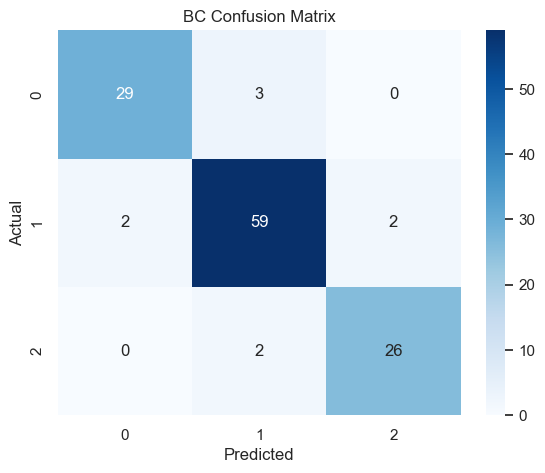

In [34]:
# Use the trained Random Forest model to make predictions on the test data
y_pred = optimized_bagging_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("BaggingClassifier Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BC Confusion Matrix')
plt.show()

#### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Set random seed for reproducibility
RANDOM_STATE = 42

# Define the model
rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Hyperparameter grid
param_dist = {
    'n_estimators': np.arange(100, 501, 50),        # 100 to 500 trees
    'max_depth': np.arange(3, 16),                  # Max depth from 3 to 15
    'min_samples_split': np.arange(10, 51, 5),      # Split threshold
    'min_samples_leaf': np.arange(10, 31, 5),       # Leaf node size
    'max_features': ['sqrt', 'log2'],               # Feature selection methods
    'bootstrap': [True, False],                     # Bootstrapping options
    'criterion': ['gini', 'entropy']                # Splitting criterion
}

# Randomized search with 100 iterations (you can increase if you have time)
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=500,
    scoring='accuracy',
    cv=cv,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    verbose=1
)

# Fit on resampled training data
random_search.fit(X_train, y_train)

# Get and print the best parameters
best_params = random_search.best_params_
print("\n Best Hyperparameters:")
for k, v in best_params.items():
    print(f"{k}: {v}")

# Train the model with best parameters
best_rf_model = RandomForestClassifier(**best_params, random_state=RANDOM_STATE)
best_rf_model.fit(X_train, y_train)  # You can also use X_train_resampled if needed

# Cross-validation on training data (original or resampled)
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

# Display results
print("\n Cross-Validation Accuracy Scores:")
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: {score:.4f}")

print(f"\n Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Deviation: {cv_scores.std():.4f}")


Fitting 5 folds for each of 500 candidates, totalling 2500 fits

 Best Hyperparameters:
n_estimators: 200
min_samples_split: 10
min_samples_leaf: 10
max_features: sqrt
max_depth: 7
criterion: gini
bootstrap: True

 Cross-Validation Accuracy Scores:
Fold 1: 0.9298
Fold 2: 0.8772
Fold 3: 0.9298
Fold 4: 0.9123
Fold 5: 0.8929

 Mean Accuracy: 0.9084
Std Deviation: 0.0207


In [36]:
# Fit model for train set
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=np.int64(7), min_samples_leaf=np.int64(10),
                       min_samples_split=np.int64(10),
                       n_estimators=np.int64(200), random_state=42)

In [37]:
# Training accuracy
rf_train_accuracy = best_rf_model.score(X_train, y_train)
print(f"Training Accuracy: {rf_train_accuracy:.6f}")

# Test accuracy
rf_test_accuracy = best_rf_model.score(X_test, y_test)
print(f"Test Accuracy: {rf_test_accuracy:.6f}")

Training Accuracy: 0.950704
Test Accuracy: 0.861789


In [38]:
# Calculate training error
bc_train_pred = optimized_bagging_model.predict(X_train)
mse_train = mean_squared_error(y_train, bc_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
bc_test_pred = optimized_bagging_model.predict(X_test)
mse_test = mean_squared_error(y_test, bc_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of RF Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of RF Tree Model:", mse_test)



Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of RF Model: 0.01056338028169014
Mean Squared Error (MSE) on Testing Set of RF Tree Model: 0.07317073170731707


RF Classification Report:
              precision    recall  f1-score   support

           0   0.920000  0.718750  0.807018        32
           1   0.810811  0.952381  0.875912        63
           2   0.958333  0.821429  0.884615        28

    accuracy                       0.861789       123
   macro avg   0.896381  0.830853  0.855848       123
weighted avg   0.872800  0.861789  0.859970       123



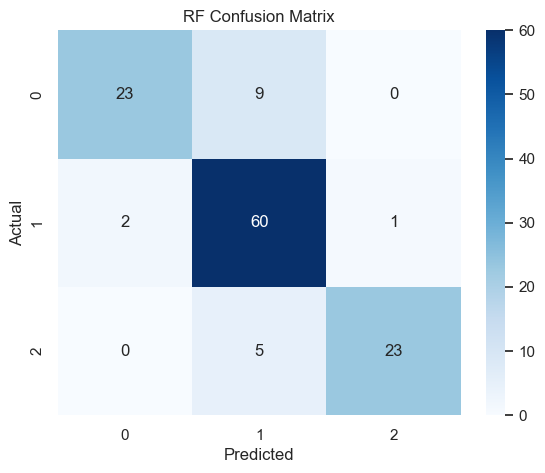

In [39]:
# Use the trained Random Forest model to make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("RF Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix')
plt.show()

### Gradient Booster

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Step 1: Initialize base model
gb_model = GradientBoostingClassifier(random_state=42)

# Step 2: Define hyperparameter grid
param_dist_gb = {
    'n_estimators': list(range(50, 201, 50)),  # 50 to 200
    'learning_rate': np.linspace(0.001, 0.05, 50).tolist(),  # 50 values between 0.001 and 0.05
    'max_depth': [3, 4, 5],
    'min_samples_split': list(range(10, 31)),  # 10 to 30
    'min_samples_leaf': list(range(10, 31)),
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': np.linspace(0.0, 0.05, 6).tolist(),  # 0.0 to 0.05
    'criterion': ['friedman_mse', 'squared_error']
}

# Step 3: Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Step 4: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=500,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1  # Shows progress
)

# Step 5: Fit model on training data
random_search.fit(X_train, y_train)

# Step 6: Extract best model and hyperparameters
best_params = random_search.best_params_
print("\nBest Hyperparameters for Gradient Boosting:\n", best_params)

optimized_gb = GradientBoostingClassifier(**best_params, random_state=42)

# Step 7: Evaluate with cross-validation
cv_scores = cross_val_score(optimized_gb, X_train, y_train, cv=cv, scoring='accuracy')

# Step 8: Output results
print("\nCross-Validation Accuracy Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.6f}")

mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"\n🔹 Mean Accuracy: {mean_accuracy:.6f}")
print(f"🔹 Standard Deviation: {std_accuracy:.6f}")


Fitting 5 folds for each of 500 candidates, totalling 2500 fits

Best Hyperparameters for Gradient Boosting:
 {'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 22, 'min_samples_leaf': 18, 'min_impurity_decrease': 0.02, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.036000000000000004, 'criterion': 'friedman_mse'}

Cross-Validation Accuracy Scores:
Fold 1: 0.947368
Fold 2: 0.842105
Fold 3: 0.894737
Fold 4: 0.964912
Fold 5: 0.964286

🔹 Mean Accuracy: 0.922682
🔹 Standard Deviation: 0.047744


In [41]:
# Fit model for train set
optimized_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.036000000000000004, max_depth=4,
                           max_features='sqrt', min_impurity_decrease=0.02,
                           min_samples_leaf=18, min_samples_split=22,
                           n_estimators=200, random_state=42, subsample=0.8)

In [42]:
# Training accuracy
gb_train_accuracy = optimized_gb.score(X_train, y_train)
print(f"Training Accuracy: {gb_train_accuracy:.6f}")

# Test accuracy
gb_test_accuracy = optimized_gb.score(X_test, y_test)
print(f"Test Accuracy: {gb_test_accuracy:.6f}")

Training Accuracy: 0.989437
Test Accuracy: 0.869919


In [43]:
# Calculate training error
gb_train_pred = optimized_gb.predict(X_train)
mse_train = mean_squared_error(y_train, gb_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
gb_test_pred = optimized_gb.predict(X_test)
mse_test = mean_squared_error(y_test, gb_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of GB Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of GB Tree Model:", mse_test)



Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of GB Model: 0.01056338028169014
Mean Squared Error (MSE) on Testing Set of GB Tree Model: 0.13008130081300814


GB Classification Report:
              precision    recall  f1-score   support

           0   0.928571  0.812500  0.866667        32
           1   0.861538  0.888889  0.875000        63
           2   0.833333  0.892857  0.862069        28

    accuracy                       0.869919       123
   macro avg   0.874481  0.864749  0.867912       123
weighted avg   0.872557  0.869919  0.869888       123



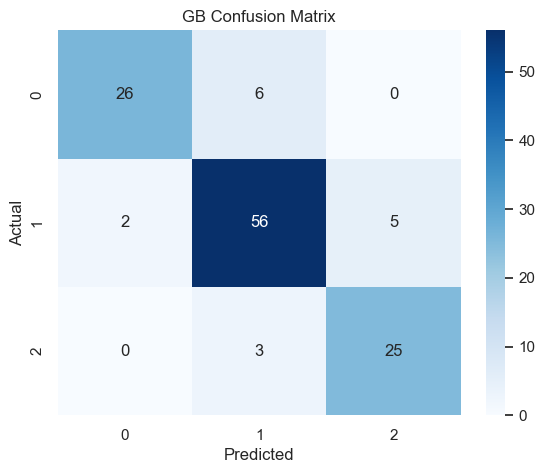

In [44]:
# Use the trained XGB model to make predictions on the test data
y_pred = optimized_gb.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("GB Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GB Confusion Matrix')
plt.show()

#### XGBoost

In [45]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Create an instance of the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the number of folds for Stratified K-Fold CV
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': list(range(100, 201)),         # 100 to 200 trees
    'max_depth': list(range(3, 6)),                # Depth 3 to 5
    'learning_rate': [0.01, 0.05, 0.1],            # Learning rates
    'subsample': [0.6, 0.7, 0.8],                  # Sample subsampling
    'colsample_bytree': [0.6, 0.7, 0.8],           # Feature subsampling
    'min_child_weight': list(range(10, 21)),       # 10 to 20
    'gamma': [0.2, 0.5, 1.0],                      # Minimum loss reduction
    # 'reg_alpha': [0.5, 1.0, 2.0],                 # Uncomment if needed
    # 'reg_lambda': [1.0, 2.0, 3.0]                  # Uncomment if needed
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=500,          # Number of parameter settings sampled
    scoring='accuracy',
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train final model with best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform cross-validation with the best model
scores = cross_val_score(best_xgb_model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.6f}")

mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


d:\Research_new\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:25:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 108, 'min_child_weight': 10, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.8}
Cross-Validation Accuracy Scores:
Fold 1: 0.947368
Fold 2: 0.912281
Fold 3: 0.912281
Fold 4: 0.877193
Fold 5: 0.928571
Mean Accuracy: 0.915539
Standard Deviation: 0.023128


In [46]:
# Fit model for train set
best_xgb_model.fit(X_train, y_train)

d:\Research_new\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:25:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=108, n_jobs=None,
              num_parallel_tree=None, ...)

In [47]:
# Training accuracy
xgb_train_accuracy = best_xgb_model.score(X_train, y_train)
print(f"Training Accuracy: {xgb_train_accuracy:.6f}")

# Test accuracy
xgb_test_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Test Accuracy: {xgb_test_accuracy:.6f}")

Training Accuracy: 0.964789
Test Accuracy: 0.886179


In [48]:
# Calculate training error
xgb_train_pred = best_xgb_model.predict(X_train)
mse_train = mean_squared_error(y_train, xgb_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
xgb_test_pred = best_xgb_model.predict(X_test)
mse_test = mean_squared_error(y_test, xgb_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of GB Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of GB Tree Model:", mse_test)



Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of GB Model: 0.035211267605633804
Mean Squared Error (MSE) on Testing Set of GB Tree Model: 0.11382113821138211


XGB Classification Report:
              precision    recall  f1-score   support

           0   0.961538  0.781250  0.862069        32
           1   0.845070  0.952381  0.895522        63
           2   0.923077  0.857143  0.888889        28

    accuracy                       0.886179       123
   macro avg   0.909895  0.863591  0.882160       123
weighted avg   0.893129  0.886179  0.885309       123



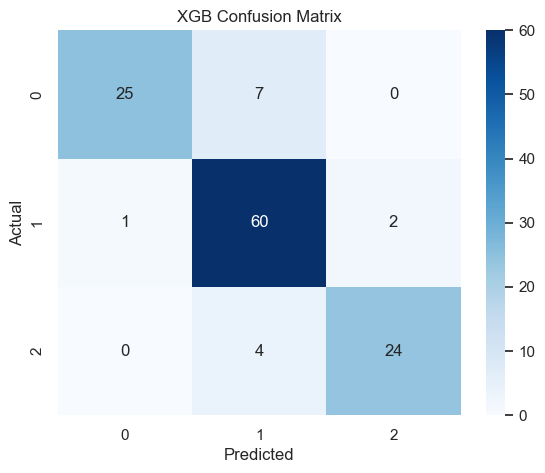

In [49]:
# Use the trained XGB model to make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("XGB Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()

#### AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Initialize DecisionTreeClassifier as the base estimator
base_tree = DecisionTreeClassifier(random_state=42)

# Initialize AdaBoostClassifier with correct parameter 'estimator'
adaboost_model = AdaBoostClassifier(estimator=base_tree, random_state=42)

# Set up 5-fold stratified cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Define the hyperparameter grid with 'estimator__' prefix
param_dist_ada = {
    'estimator__max_depth': list(range(2, 6)),
    'estimator__min_samples_split': list(range(10, 51)),
    'estimator__min_samples_leaf': list(range(5, 31)),
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__max_leaf_nodes': list(range(10, 31)),
    'n_estimators': list(range(10, 51)),
    'learning_rate': np.linspace(0.001, 0.05, 50).tolist(),
}

# Perform RandomizedSearchCV to tune hyperparameters
random_search_ada = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_dist_ada,
    n_iter=500,
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model to your training data (replace with your actual data)
random_search_ada.fit(X_train, y_train)

# Retrieve best hyperparameters
best_params_ada = random_search_ada.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_ada)

# Separate base estimator and AdaBoost parameters
tree_params = {key.split('__')[1]: value for key, value in best_params_ada.items() if key.startswith('estimator__')}
ada_params = {key: value for key, value in best_params_ada.items() if not key.startswith('estimator__')}

# Rebuild base estimator and optimized AdaBoost model
optimized_tree = DecisionTreeClassifier(**tree_params, random_state=42)
optimized_ada_model = AdaBoostClassifier(estimator=optimized_tree, **ada_params, random_state=42)

# Perform cross-validation
scores_ada = cross_val_score(optimized_ada_model, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Accuracy Scores for AdaBoost:")
for i, score in enumerate(scores_ada):
    print(f"Fold {i+1}: {score:.6f}")

# Compute mean and standard deviation
mean_accuracy_ada = np.mean(scores_ada)
std_accuracy_ada = np.std(scores_ada)
print(f"Mean Accuracy: {mean_accuracy_ada:.6f}")
print(f"Standard Deviation: {std_accuracy_ada:.6f}")


Best Hyperparameters for AdaBoost: {'n_estimators': 37, 'learning_rate': 0.043000000000000003, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 10, 'estimator__max_leaf_nodes': 19, 'estimator__max_features': 'log2', 'estimator__max_depth': 4}
Cross-Validation Accuracy Scores for AdaBoost:
Fold 1: 0.877193
Fold 2: 0.877193
Fold 3: 0.894737
Fold 4: 0.912281
Fold 5: 0.946429
Mean Accuracy: 0.901566
Standard Deviation: 0.025931


In [51]:
# Fit AdaBoost model for train set
optimized_ada_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_features='log2',
                                                    max_leaf_nodes=19,
                                                    min_samples_leaf=10,
                                                    min_samples_split=10,
                                                    random_state=42),
                   learning_rate=0.043000000000000003, n_estimators=37,
                   random_state=42)

In [52]:
# Training accuracy
ab_train_accuracy = optimized_ada_model.score(X_train, y_train)
print(f"Training Accuracy: {ab_train_accuracy:.6f}")

# Test accuracy
ab_test_accuracy = optimized_ada_model.score(X_test, y_test)
print(f"Test Accuracy: {ab_test_accuracy:.6f}")

Training Accuracy: 0.961268
Test Accuracy: 0.869919


In [53]:
# Calculate training error
ab_train_pred = optimized_ada_model.predict(X_train)
mse_train = mean_squared_error(y_train, ab_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
ab_test_pred = optimized_ada_model.predict(X_test)
mse_test = mean_squared_error(y_test, ab_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of GB Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of GB Tree Model:", mse_test)



Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of GB Model: 0.03873239436619718
Mean Squared Error (MSE) on Testing Set of GB Tree Model: 0.13008130081300814


Ada Boot Classification Report:
              precision    recall  f1-score   support

           0   0.920000  0.718750  0.807018        32
           1   0.821918  0.952381  0.882353        63
           2   0.960000  0.857143  0.905660        28

    accuracy                       0.869919       123
   macro avg   0.900639  0.842758  0.865010       123
weighted avg   0.878868  0.869919  0.868059       123



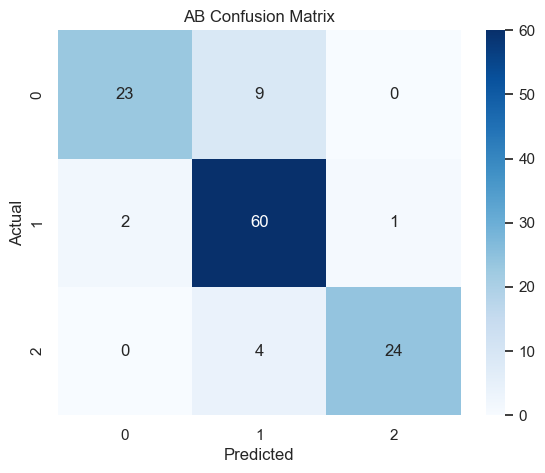

In [54]:
# Use the trained AB model to make predictions on the test data
y_pred = optimized_ada_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("Ada Boot Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AB Confusion Matrix')
plt.show()

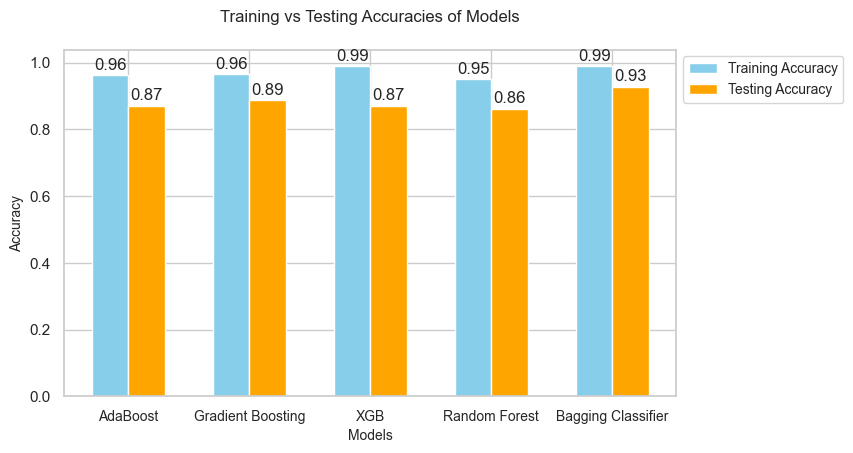

In [55]:
# Define models and their accuracies dynamically
models = ['AdaBoost', 'Gradient Boosting', 'XGB','Random Forest', 'Bagging Classifier']
train_accuracies = [ab_train_accuracy, xgb_train_accuracy, gb_train_accuracy, rf_train_accuracy, bc_train_accuracy]
test_accuracies = [ab_test_accuracy ,xgb_test_accuracy, gb_test_accuracy, rf_test_accuracy, bc_test_accuracy]

# Bar chart setup
x = np.arange(len(models))  # Label locations
width = 0.3  # Width of the bars

# Increase figure size for clarity
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with adjusted bar spacing
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('Training vs Testing Accuracies of Models', fontsize=12,  pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Add accuracy values on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 2),  # Increase text offset for clarity
                textcoords="offset points",
                ha='center', va='bottom')

# Add padding around the chart
plt.tight_layout(pad=5.0)

# Show the plot
plt.show()

In [56]:
# Create a VotingClassifier with the best hyperparameters for voting='hard'
ensemble_classifier = VotingClassifier(
    estimators=[('gb', optimized_gb), ('ab', optimized_ada_model), ('bag', optimized_bagging_model)],
    voting='hard'  # Uses majority rule voting, where the class with the most votes is selected 
)

In [57]:
# Fit model for train set
ensemble_classifier.fit(X_train, y_train)

VotingClassifier(estimators=[('gb',
                              GradientBoostingClassifier(learning_rate=0.036000000000000004,
                                                         max_depth=4,
                                                         max_features='sqrt',
                                                         min_impurity_decrease=0.02,
                                                         min_samples_leaf=18,
                                                         min_samples_split=22,
                                                         n_estimators=200,
                                                         random_state=42,
                                                         subsample=0.8)),
                             ('ab',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                                                  max_features='log2',
                                                                                  max_leaf_nodes=19,
                                                                                  min_samples_leaf=10,
                                                                                  min_samples_split=10,
                                                                                  random_state=42),
                                                 learning_rate=0.043000000000000003,
                                                 n_estimators=37,
                                                 random_state=42)),
                             ('bag',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=22,
                                                                                 min_samples_leaf=2,
                                                                                 min_samples_split=4,
                                                                                 random_state=42),
                                                max_features=0.7,
                                                max_samples=0.8,
                                                n_estimators=100,
                                                random_state=42))])

In [58]:
# Training accuracy
ensemble_train_accuracy = ensemble_classifier.score(X_train, y_train)
print(f"Training Accuracy: {ensemble_train_accuracy:.6f}")

# Test accuracy
ensemble_test_accuracy = ensemble_classifier.score(X_test, y_test)
print(f"Test Accuracy: {ensemble_test_accuracy:.6f}")

Training Accuracy: 0.989437
Test Accuracy: 0.902439


### Class Balacing (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [60]:
y_train_resampled.value_counts()

Psychomotor_Level
1    146
0    146
2    146
Name: count, dtype: int64

## Bagging techniques

### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Initialize the base BaggingClassifier with the correct 'estimator' parameter
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42), random_state=42)

# Specify the number of cross-validation folds
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Define the hyperparameter distribution for RandomizedSearchCV
param_dist = {
    'estimator__max_depth': list(range(5, 26)),  # max_depth values from 5 to 25
    'estimator__min_samples_split': list(range(2, 16)),  # min_samples_split values from 2 to 15
    'estimator__min_samples_leaf': list(range(1, 11)),  # min_samples_leaf values from 1 to 10
    'n_estimators': list(range(50, 201, 50)),  # n_estimators values: 50, 100, 150, 200
    'max_samples': [x / 10 for x in range(6, 11)],  # max_samples values from 0.6 to 1.0
    'max_features': [x / 10 for x in range(6, 11)],  # max_features values from 0.6 to 1.0
    'bootstrap': [True, False]  # bootstrap options
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=bagging_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random combinations to try
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Fit RandomizedSearchCV to find the best hyperparameters
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Extract parameters for the base estimator (DecisionTreeClassifier)
base_estimator_params = {
    'max_depth': best_params.pop('estimator__max_depth'),
    'min_samples_split': best_params.pop('estimator__min_samples_split'),
    'min_samples_leaf': best_params.pop('estimator__min_samples_leaf'),
}

# Initialize the base DecisionTreeClassifier with the best parameters
base_estimator = DecisionTreeClassifier(**base_estimator_params, random_state=42)

# Initialize the optimized BaggingClassifier with the best parameters
optimized_bagging_model = BaggingClassifier(estimator=base_estimator, **best_params, random_state=42)

# Perform K-fold cross-validation to evaluate the optimized model
scores = cross_val_score(optimized_bagging_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i + 1}: {score:.6f}")

# Calculate and print mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Best Hyperparameters: {'n_estimators': 100, 'max_samples': 0.8, 'max_features': 0.7, 'estimator__min_samples_split': 4, 'estimator__min_samples_leaf': 2, 'estimator__max_depth': 22, 'bootstrap': True}
Cross-Validation Accuracy Scores:
Fold 1: 0.954545
Fold 2: 0.931818
Fold 3: 0.943182
Fold 4: 0.931034
Fold 5: 0.954023
Mean Accuracy: 0.942921
Standard Deviation: 0.010228


##### 70 - 30 split model training and evaluation

In [109]:
# Fit model for train set
optimized_bagging_model.fit(X_train_resampled, y_train_resampled)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=22,
                                                   min_samples_leaf=2,
                                                   min_samples_split=4,
                                                   random_state=42),
                  max_features=0.7, max_samples=0.8, n_estimators=100,
                  random_state=42)

In [110]:
# Training accuracy
bc_train_accuracy = optimized_bagging_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {bc_train_accuracy:.6f}")

# Test accuracy
bc_test_accuracy = optimized_bagging_model.score(X_test, y_test)
print(f"Test Accuracy: {bc_test_accuracy:.6f}")

Training Accuracy: 0.995434
Test Accuracy: 0.918699


In [111]:
# Calculate training error
bg_train_pred = optimized_bagging_model.predict(X_train)
mse_train = mean_squared_error(y_train, bg_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
bg_test_pred = optimized_bagging_model.predict(X_test)
mse_test = mean_squared_error(y_test, bg_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of BC Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of BC Tree Model:", mse_test)

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of BC Model: 0.007042253521126761
Mean Squared Error (MSE) on Testing Set of BC Tree Model: 0.08130081300813008


BaggingClassifier Classification Report:
              precision    recall  f1-score   support

           0   0.906250  0.906250  0.906250        32
           1   0.934426  0.904762  0.919355        63
           2   0.900000  0.964286  0.931034        28

    accuracy                       0.918699       123
   macro avg   0.913559  0.925099  0.918880       123
weighted avg   0.919259  0.918699  0.918604       123



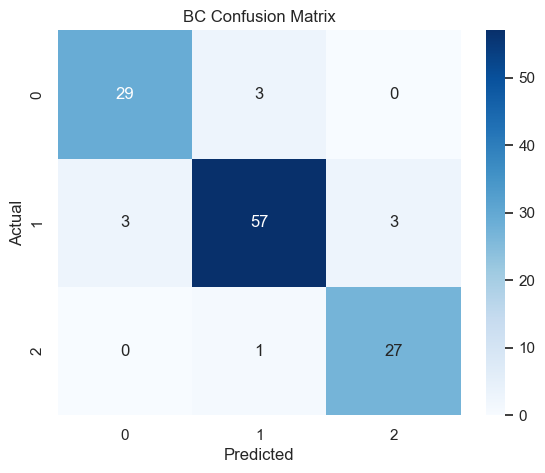

In [112]:
# Use the trained Random Forest model to make predictions on the test data
y_pred = optimized_bagging_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("BaggingClassifier Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('BC Confusion Matrix')
plt.show()

#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Specify the number of cross-validation folds (K) - e.g., 5-fold cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# # Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': range(100, 501, 50),  # Increased range for n_estimators
    'max_depth': range(3, 16),  # Limit max_depth to prevent deep trees
    'min_samples_split': range(10, 51, 5),  # Increased min_samples_split
    'min_samples_leaf': range(10, 31, 5),  # Increased min_samples_leaf
    'max_features': ['sqrt', 'log2'],  # Use a smaller number of features for each tree
    'bootstrap': [True, False],  # Force bootstraping to reduce overfitting
    'criterion': ['gini', 'entropy']  # Use only 'gini' as the criterion to prevent overfitting
}

# Create RandomizedSearchCV with the Random Forest model and parameter grid
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=500,  # Number of random combinations to try
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available CPU cores for parallel processing
)

# Perform Randomized Search to find the best hyperparameters
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params)

# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(best_rf_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Best Hyperparameters: {'n_estimators': 400, 'min_samples_split': 20, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 14, 'criterion': 'gini', 'bootstrap': True}
Cross-Validation Accuracy Scores:
Fold 1: 0.943182
Fold 2: 0.920455
Fold 3: 0.943182
Fold 4: 0.931034
Fold 5: 0.954023
Mean Accuracy: 0.938375
Standard Deviation: 0.011542


##### 70 - 30 split model training and evaluation

In [67]:
# Fit model for train set
best_rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=14, max_features='log2', min_samples_leaf=10,
                       min_samples_split=20, n_estimators=400)

In [68]:
# Training accuracy
rf_train_accuracy = best_rf_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {rf_train_accuracy:.6f}")

# Test accuracy
rf_test_accuracy = best_rf_model.score(X_test, y_test)
print(f"Test Accuracy: {rf_test_accuracy:.6f}")

Training Accuracy: 0.970320
Test Accuracy: 0.910569


RF Classification Report:
              precision    recall  f1-score   support

           0   0.903226  0.875000  0.888889        32
           1   0.919355  0.904762  0.912000        63
           2   0.900000  0.964286  0.931034        28

    accuracy                       0.910569       123
   macro avg   0.907527  0.914683  0.910641       123
weighted avg   0.910753  0.910569  0.910320       123



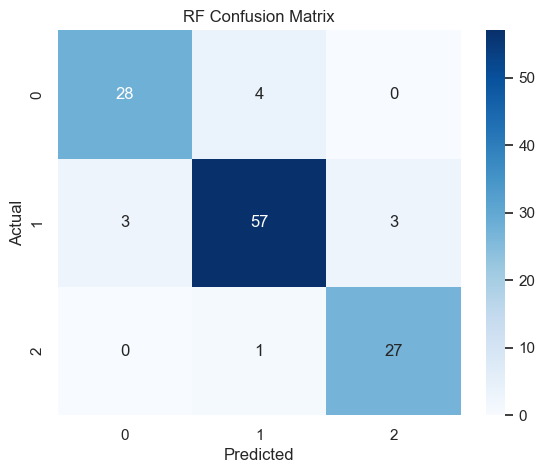

In [69]:
# Use the trained Random Forest model to make predictions on the test data
y_pred = best_rf_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("RF Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix')
plt.show()

## Boosting techniques

### XGBoost

In [70]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Create an instance of the XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define the number of folds for Stratified K-Fold CV
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': list(range(50, 201, 50)),  # Gives [50, 100, 150, 200]
    'max_depth': list(range(3, 6)),                # Depth 3 to 5
    'learning_rate': [0.01, 0.05, 0.1],            # Learning rates
    'subsample': [0.6, 0.7, 0.8],                  # Sample subsampling
    'colsample_bytree': [0.6, 0.7, 0.8],           # Feature subsampling
    'min_child_weight': list(range(10, 21)),       # 10 to 20
    'gamma': [0.2, 0.5, 1.0],                      # Minimum loss reduction
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=500,          # Number of parameter settings sampled
    scoring='accuracy',
    cv=cv,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train_resampled, y_train_resampled)

# Best hyperparameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Train final model with best hyperparameters
best_xgb_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform cross-validation with the best model
scores = cross_val_score(best_xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy', n_jobs=-1)

print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.6f}")

mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


d:\Research_new\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:35:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Hyperparameters: {'subsample': 0.8, 'n_estimators': 150, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.8}
Cross-Validation Accuracy Scores:
Fold 1: 0.943182
Fold 2: 0.965909
Fold 3: 0.897727
Fold 4: 0.977011
Fold 5: 0.942529
Mean Accuracy: 0.945272
Standard Deviation: 0.027224


##### 70 - 30 split model training and evaluation for XG Boost

In [71]:
# Fit XGB model for train set
best_xgb_model.fit(X_train_resampled, y_train_resampled)

d:\Research_new\.venv\lib\site-packages\xgboost\training.py:183: UserWarning: [21:35:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [72]:
# Training accuracy
xgb_train_accuracy = best_xgb_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {xgb_train_accuracy:.6f}")

# Test accuracy
xgb_test_accuracy = best_xgb_model.score(X_test, y_test)
print(f"Test Accuracy: {xgb_test_accuracy:.6f}")

Training Accuracy: 0.968037
Test Accuracy: 0.861789


In [73]:
# Calculate training error
xgb_train_pred = best_xgb_model.predict(X_train)
mse_train = mean_squared_error(y_train, xgb_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
xgb_test_pred = best_xgb_model.predict(X_test)
mse_test = mean_squared_error(y_test, xgb_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of GB Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of GB Tree Model:", mse_test)

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of GB Model: 0.03873239436619718
Mean Squared Error (MSE) on Testing Set of GB Tree Model: 0.13821138211382114


XGB Classification Report:
              precision    recall  f1-score   support

           0   0.878788  0.906250  0.892308        32
           1   0.870968  0.857143  0.864000        63
           2   0.821429  0.821429  0.821429        28

    accuracy                       0.861789       123
   macro avg   0.857061  0.861607  0.859245       123
weighted avg   0.861725  0.861789  0.861674       123



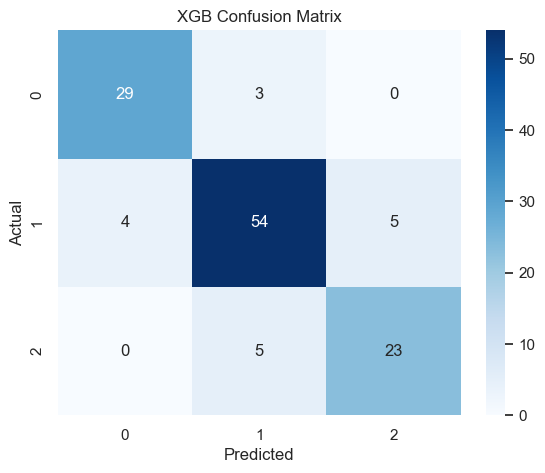

In [74]:
# Use the trained XGB model to make predictions on the test data
y_pred = best_xgb_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("XGB Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGB Confusion Matrix')
plt.show()

### Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Step 1: Initialize base model
gb_model = GradientBoostingClassifier(random_state=42)

# Step 2: Define hyperparameter grid
param_dist_gb = {
    'n_estimators': list(range(50, 201, 50)),  # 50 to 200
    'learning_rate': np.linspace(0.001, 0.05, 50).tolist(),  # 50 values between 0.001 and 0.05
    'max_depth': [3, 4, 5],
    'min_samples_split': list(range(10, 31)),  # 10 to 30
    'min_samples_leaf': list(range(10, 31)),
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': np.linspace(0.0, 0.05, 6).tolist(),  # 0.0 to 0.05
    'criterion': ['friedman_mse', 'squared_error']
}

# Step 3: Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Step 4: Perform RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist_gb,
    n_iter=500,
    scoring='accuracy',
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1  # Shows progress
)

# Step 5: Fit model on training data
random_search.fit(X_train_resampled, y_train_resampled)

# Step 6: Extract best model and hyperparameters
best_params = random_search.best_params_
print("\nBest Hyperparameters for Gradient Boosting:\n", best_params)

optimized_gb = GradientBoostingClassifier(**best_params, random_state=42)

# Step 7: Evaluate with cross-validation
cv_scores = cross_val_score(optimized_gb, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Step 8: Output results
print("\nCross-Validation Accuracy Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.6f}")

mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"\n🔹 Mean Accuracy: {mean_accuracy:.6f}")
print(f"🔹 Standard Deviation: {std_accuracy:.6f}")


Fitting 5 folds for each of 500 candidates, totalling 2500 fits

Best Hyperparameters for Gradient Boosting:
 {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 17, 'min_samples_leaf': 10, 'min_impurity_decrease': 0.02, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.030000000000000002, 'criterion': 'friedman_mse'}

Cross-Validation Accuracy Scores:
Fold 1: 0.931818
Fold 2: 0.920455
Fold 3: 0.977273
Fold 4: 0.942529
Fold 5: 0.965517

🔹 Mean Accuracy: 0.947518
🔹 Standard Deviation: 0.021039


##### 70 - 30 split model training and evaluation for Gradient Boost

In [76]:
# Fit XGB model for train set
optimized_gb.fit(X_train_resampled, y_train_resampled)

GradientBoostingClassifier(learning_rate=0.030000000000000002, max_depth=4,
                           min_impurity_decrease=0.02, min_samples_leaf=10,
                           min_samples_split=17, n_estimators=200,
                           random_state=42, subsample=0.6)

In [77]:
# Training accuracy
GB_train_accuracy = optimized_gb.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {GB_train_accuracy:.6f}")

# Test accuracy
GB_test_accuracy = optimized_gb.score(X_test, y_test)
print(f"Test Accuracy: {GB_test_accuracy:.6f}")

Training Accuracy: 0.995434
Test Accuracy: 0.902439


In [78]:
# Calculate training error
gb_train_pred = optimized_gb.predict(X_train)
mse_train = mean_squared_error(y_train, gb_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
gb_test_pred = optimized_gb.predict(X_test)
mse_test = mean_squared_error(y_test, gb_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of GB Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of GB Tree Model:", mse_test)

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of GB Model: 0.007042253521126761
Mean Squared Error (MSE) on Testing Set of GB Tree Model: 0.0975609756097561


GB Classification Report:
              precision    recall  f1-score   support

           0   0.900000  0.843750  0.870968        32
           1   0.892308  0.920635  0.906250        63
           2   0.928571  0.928571  0.928571        28

    accuracy                       0.902439       123
   macro avg   0.906960  0.897652  0.901930       123
weighted avg   0.902564  0.902439  0.902152       123



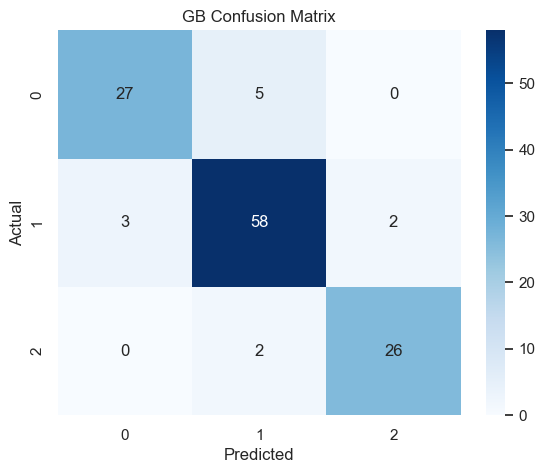

In [79]:
# Use the trained XGB model to make predictions on the test data
y_pred = optimized_gb.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("GB Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('GB Confusion Matrix')
plt.show()

## Ada Boost

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_score
import numpy as np

# Initialize DecisionTreeClassifier as the base estimator
base_tree = DecisionTreeClassifier(random_state=42)

# Initialize AdaBoostClassifier with correct parameter 'estimator'
adaboost_model = AdaBoostClassifier(estimator=base_tree, random_state=42)

# Set up 5-fold stratified cross-validation
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=4)

# Define the hyperparameter grid with 'estimator__' prefix
param_dist_ada = {
    'estimator__max_depth': list(range(2, 6)),
    'estimator__min_samples_split': list(range(10, 51)),
    'estimator__min_samples_leaf': list(range(5, 31)),
    'estimator__max_features': ['sqrt', 'log2'],
    'estimator__max_leaf_nodes': list(range(10, 31)),
    'n_estimators': list(range(10, 51)),
    'learning_rate': np.linspace(0.001, 0.05, 50).tolist(),
}

# Perform RandomizedSearchCV to tune hyperparameters
random_search_ada = RandomizedSearchCV(
    estimator=adaboost_model,
    param_distributions=param_dist_ada,
    n_iter=500,
    cv=cv,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

# Fit the model to your training data (replace with your actual data)
random_search_ada.fit(X_train_resampled, y_train_resampled)

# Retrieve best hyperparameters
best_params_ada = random_search_ada.best_params_
print("Best Hyperparameters for AdaBoost:", best_params_ada)

# Separate base estimator and AdaBoost parameters
tree_params = {key.split('__')[1]: value for key, value in best_params_ada.items() if key.startswith('estimator__')}
ada_params = {key: value for key, value in best_params_ada.items() if not key.startswith('estimator__')}

# Rebuild base estimator and optimized AdaBoost model
optimized_tree = DecisionTreeClassifier(**tree_params, random_state=42)
optimized_ada_model = AdaBoostClassifier(estimator=optimized_tree, **ada_params, random_state=42)

# Perform cross-validation
scores_ada = cross_val_score(optimized_ada_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Accuracy Scores for AdaBoost:")
for i, score in enumerate(scores_ada):
    print(f"Fold {i+1}: {score:.6f}")

# Compute mean and standard deviation
mean_accuracy_ada = np.mean(scores_ada)
std_accuracy_ada = np.std(scores_ada)
print(f"Mean Accuracy: {mean_accuracy_ada:.6f}")
print(f"Standard Deviation: {std_accuracy_ada:.6f}")


Best Hyperparameters for AdaBoost: {'n_estimators': 45, 'learning_rate': 0.043000000000000003, 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 12, 'estimator__max_leaf_nodes': 26, 'estimator__max_features': 'log2', 'estimator__max_depth': 5}
Cross-Validation Accuracy Scores for AdaBoost:
Fold 1: 0.943182
Fold 2: 0.920455
Fold 3: 0.931818
Fold 4: 0.954023
Fold 5: 0.954023
Mean Accuracy: 0.940700
Standard Deviation: 0.013038


##### 70 - 30 split model training and evaluation for XG Boost

In [81]:
# Fit AdaBoost model for train set
optimized_ada_model.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                    max_features='log2',
                                                    max_leaf_nodes=26,
                                                    min_samples_leaf=12,
                                                    min_samples_split=10,
                                                    random_state=42),
                   learning_rate=0.043000000000000003, n_estimators=45,
                   random_state=42)

In [82]:
# Training accuracy
ab_train_accuracy = optimized_ada_model.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {ab_train_accuracy:.6f}")

# Test accuracy
ab_test_accuracy = optimized_ada_model.score(X_test, y_test)
print(f"Test Accuracy: {ab_test_accuracy:.6f}")

Training Accuracy: 0.986301
Test Accuracy: 0.910569


In [83]:
# Calculate training error
ad_train_pred = optimized_ada_model.predict(X_train)
mse_train = mean_squared_error(y_train, ad_train_pred)
train_accuracy = 1 - mse_train

# Calculate testing error
ad_test_pred = optimized_ada_model.predict(X_test)
mse_test = mean_squared_error(y_test, ad_test_pred)
test_accuracy = 1 - mse_test

# Print evaluation metrics

print("Error of Training and Testing data:\n")
print("Mean Squared Error (MSE) on Training Set of GB Model:", mse_train)
print("Mean Squared Error (MSE) on Testing Set of GB Tree Model:", mse_test)

Error of Training and Testing data:

Mean Squared Error (MSE) on Training Set of GB Model: 0.017605633802816902
Mean Squared Error (MSE) on Testing Set of GB Tree Model: 0.08943089430894309


Ada Boot Classification Report:
              precision    recall  f1-score   support

           0   0.928571  0.812500  0.866667        32
           1   0.893939  0.936508  0.914729        63
           2   0.931034  0.964286  0.947368        28

    accuracy                       0.910569       123
   macro avg   0.917848  0.904431  0.909588       123
weighted avg   0.911394  0.910569  0.909655       123



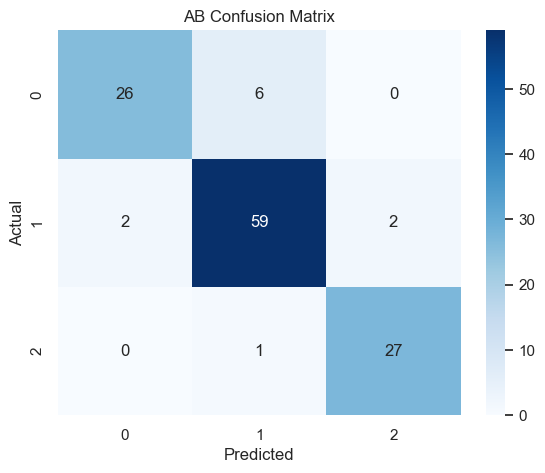

In [84]:
# Use the trained AB model to make predictions on the test data
y_pred = optimized_ada_model.predict(X_test)

# Print the Classification Report with 4 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("Ada Boot Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AB Confusion Matrix')
plt.show()

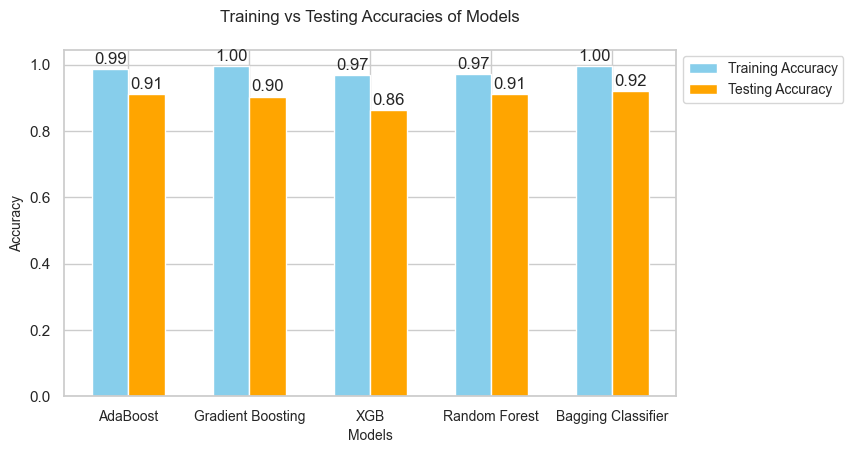

In [113]:
# Define models and their accuracies dynamically
models = ['AdaBoost', 'Gradient Boosting', 'XGB','Random Forest', 'Bagging Classifier']
train_accuracies = [ab_train_accuracy, GB_train_accuracy,xgb_train_accuracy, rf_train_accuracy, bc_train_accuracy]
test_accuracies = [ab_test_accuracy, GB_test_accuracy,xgb_test_accuracy, rf_test_accuracy, bc_test_accuracy]

# Bar chart setup
x = np.arange(len(models))  # Label locations
width = 0.3  # Width of the bars

# Increase figure size for clarity
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars with adjusted bar spacing
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.set_title('Training vs Testing Accuracies of Models', fontsize=12,  pad=20)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=10)
ax.legend(fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))

# Add accuracy values on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 2),  # Increase text offset for clarity
                textcoords="offset points",
                ha='center', va='bottom')

# Add padding around the chart
plt.tight_layout(pad=5.0)

# Show the plot
plt.show()

In [101]:
# Create a VotingClassifier with the best hyperparameters for voting='hard'
ensemble_classifier = VotingClassifier(
    estimators=[('rf', best_rf_model), ('ab', optimized_ada_model), ('bag', optimized_bagging_model)],
    voting='hard'  # Uses majority rule voting, where the class with the most votes is selected 
)

In [102]:
# Perform K-fold cross-validation and get the classification scores
scores = cross_val_score(ensemble_classifier, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

In [103]:
# Print the accuracy for each fold
print("Cross-Validation Accuracy Scores:")
for i, score in enumerate(scores):
    print(f"Fold {i+1}: {score:.6f}")

Cross-Validation Accuracy Scores:
Fold 1: 0.977273
Fold 2: 0.931818
Fold 3: 0.931818
Fold 4: 0.942529
Fold 5: 0.954023


In [104]:
# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f"Mean Accuracy: {mean_accuracy:.6f}")
print(f"Standard Deviation: {std_accuracy:.6f}")

Mean Accuracy: 0.947492
Standard Deviation: 0.017003


In [105]:
# Fit model for train set
ensemble_classifier.fit(X_train_resampled, y_train_resampled)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=14,
                                                     max_features='log2',
                                                     min_samples_leaf=10,
                                                     min_samples_split=20,
                                                     n_estimators=400)),
                             ('ab',
                              AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                                  max_features='log2',
                                                                                  max_leaf_nodes=26,
                                                                                  min_samples_leaf=12,
                                                                                  min_samples_split=10,
                                                                                  random_state=42),
                                                 learning_rate=0.043000000000000003,
                                                 n_estimators=45,
                                                 random_state=42)),
                             ('bag',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                                                 min_samples_split=5,
                                                                                 random_state=42),
                                                max_features=0.6,
                                                max_samples=0.9,
                                                n_estimators=100,
                                                random_state=42))])

In [106]:
# Training accuracy
ensemble_train_accuracy = ensemble_classifier.score(X_train_resampled, y_train_resampled)
print(f"Training Accuracy: {ensemble_train_accuracy:.6f}")

# Test accuracy
ensemble_test_accuracy = ensemble_classifier.score(X_test, y_test)
print(f"Test Accuracy: {ensemble_test_accuracy:.6f}")

Training Accuracy: 0.988584
Test Accuracy: 0.926829


EC Classification Report:
              precision    recall  f1-score   support

           0   0.933333  0.875000  0.903226        32
           1   0.921875  0.936508  0.929134        63
           2   0.931034  0.964286  0.947368        28

    accuracy                       0.926829       123
   macro avg   0.928748  0.925265  0.926576       123
weighted avg   0.926941  0.926829  0.926545       123



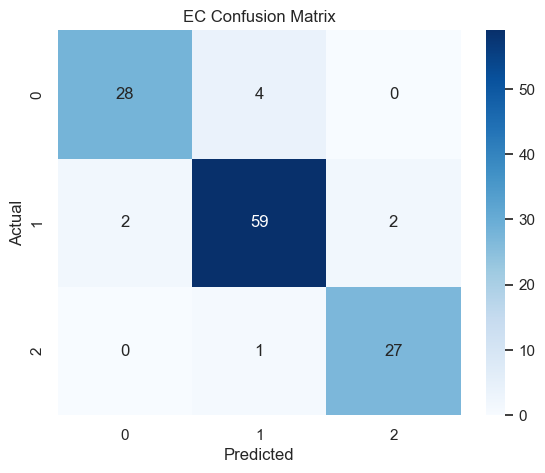

In [107]:
# Use the trained XGB model to make predictions on the test data
y_pred = ensemble_classifier.predict(X_test)

# Print the Classification Report with 6 decimal points
report = classification_report(y_test, y_pred, digits=6)
print("EC Classification Report:")
print(report)

# Print the Confusion Matrix using a Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6.5, 5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('EC Confusion Matrix')
plt.show()

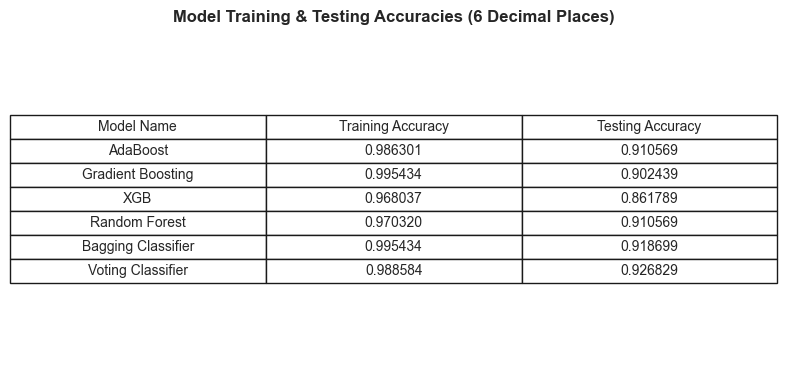

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Define models and their accuracies
models = ['AdaBoost', 'Gradient Boosting', 'XGB', 'Random Forest', 'Bagging Classifier', 'Voting Classifier']
train_accuracies = [ab_train_accuracy, GB_train_accuracy, xgb_train_accuracy, rf_train_accuracy, bc_train_accuracy, ensemble_train_accuracy]
test_accuracies = [ab_test_accuracy, GB_test_accuracy, xgb_test_accuracy, rf_test_accuracy, bc_test_accuracy, ensemble_test_accuracy]

# Format to 6 decimal places
formatted_train = [f"{acc:.6f}" for acc in train_accuracies]
formatted_test = [f"{acc:.6f}" for acc in test_accuracies]

# Create DataFrame
df = pd.DataFrame({
    "Model Name": models,
    "Training Accuracy": formatted_train,
    "Testing Accuracy": formatted_test
})

# Plot table
fig, ax = plt.subplots(figsize=(9, len(df)*0.6 + 1))
ax.axis('off')

# Title with reduced padding
plt.title("Model Training & Testing Accuracies (6 Decimal Places)", fontsize=12, weight='bold', pad=5)

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.1, 1.5)

# Save or show with tighter bounding
plt.subplots_adjust(top=0.85)  # Adjust this value to fine-tune title-table spacing
plt.show()


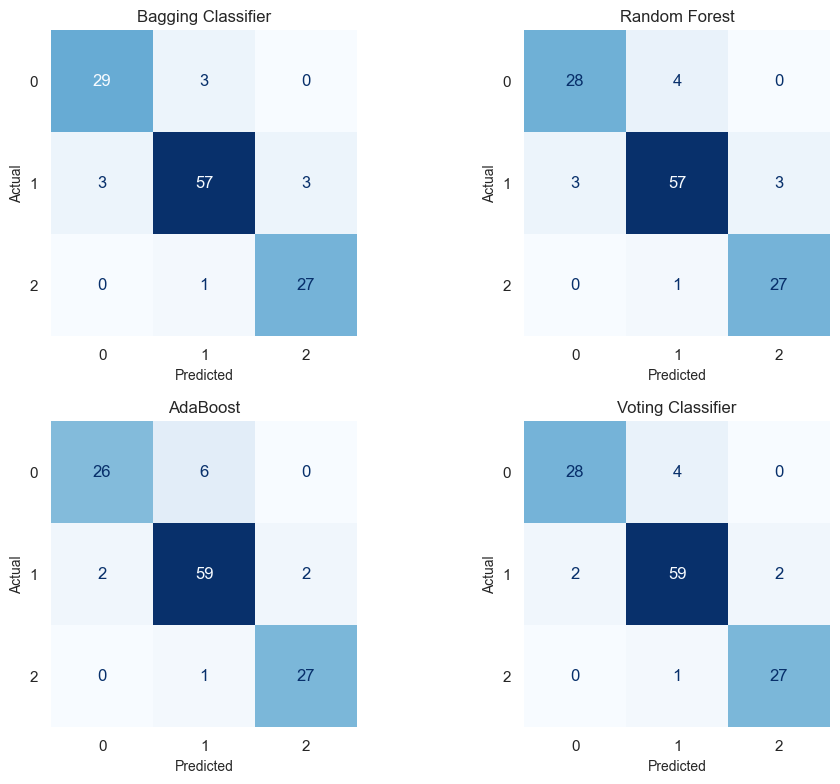

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using each classifier
y_pred_bagging = optimized_bagging_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_ada = optimized_ada_model.predict(X_test)
y_pred_voting = ensemble_classifier.predict(X_test)

# Compute confusion matrices
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_ada = confusion_matrix(y_test, y_pred_ada)
cm_voting = confusion_matrix(y_test, y_pred_voting)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
titles = ['Bagging Classifier', 'Random Forest', 'AdaBoost', 'Voting Classifier']
cms = [cm_bagging, cm_rf, cm_ada, cm_voting]

for ax, cm, title in zip(axes.ravel(), cms, titles):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    
    # Remove grid lines
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.grid(False)
    
    ax.set_title(title, fontsize=12)
    ax.set_xlabel('Predicted', fontsize=10)
    ax.set_ylabel('Actual', fontsize=10)

plt.tight_layout()
plt.show()


### Save the models

In [116]:
import pickle

# Save the Voting Classifier model
with open('voting_classifier_model.pkl', 'wb') as f:
    pickle.dump(ensemble_classifier, f)

# Save individual models as well
# with open('gradient_boosting_model.pkl', 'wb') as f:
#     pickle.dump(optimized_gb_model, f)
# with open('abboost_model.pkl', 'wb') as f:
#     pickle.dump(optimized_ada_model, f)
# with open('bagging_classifier_model.pkl', 'wb') as f:
#     pickle.dump(optimized_bagging_model, f)


### Model Explanability


📌 Topic: Model Explainability using SHAP
🎯 Objective: Analyze the contribution of each feature to the predictions made by different ML models.

🧠 Model: Bagging Classifier


100%|██████████| 123/123 [01:47<00:00,  1.14it/s]

📊 SHAP values calculated for Bagging Classifier.



C:\Users\DELL\AppData\Local\Temp\ipykernel_20236\2300996874.py:32: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_bagging, X_test, plot_type="bar", class_names=optimized_bagging_model.classes_,


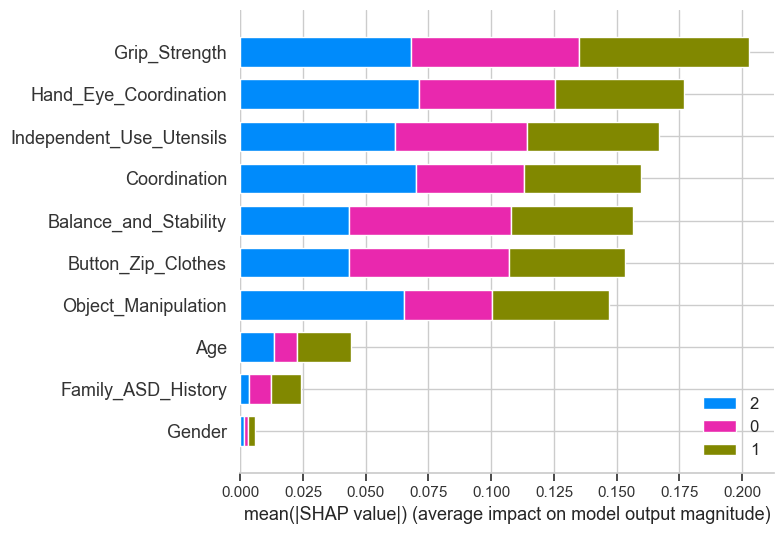

📈 Visualization: Feature importance for Bagging Classifier shown.

🧠 Model: Random Forest
📊 SHAP values calculated for Random Forest.


C:\Users\DELL\AppData\Local\Temp\ipykernel_20236\2300996874.py:42: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_rf, X_test, plot_type="bar", class_names=best_rf_model.classes_, show=True)


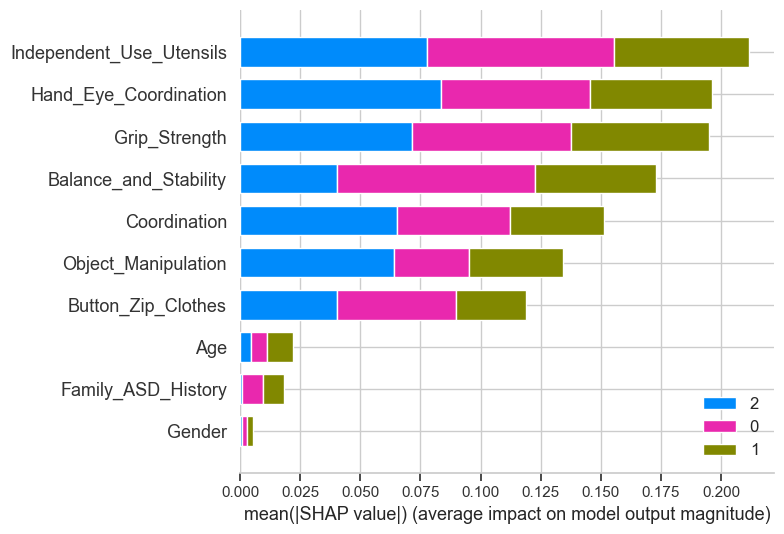

📈 Visualization: Feature importance for Random Forest shown.

🧠 Model: AdaBoost


100%|██████████| 123/123 [00:43<00:00,  2.83it/s]
C:\Users\DELL\AppData\Local\Temp\ipykernel_20236\2300996874.py:51: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_ada, X_test, plot_type="bar", class_names=optimized_ada_model.classes_, show=True)


📊 SHAP values calculated for AdaBoost.


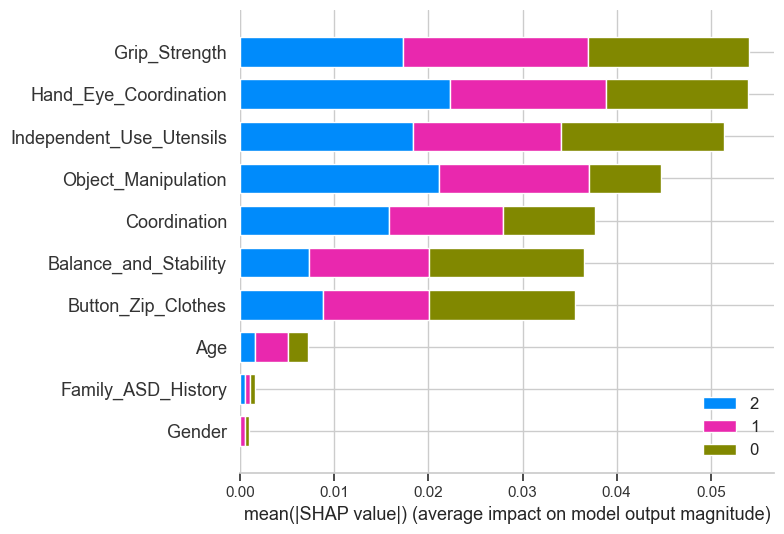

📈 Visualization: Feature importance for AdaBoost shown.


In [121]:
import shap

# Define feature names
features = [
    "Gender",
    "Age",
    "Family_ASD_History",
    "Balance_and_Stability",
    "Grip_Strength",
    "Coordination",
    "Hand_Eye_Coordination",
    "Object_Manipulation",
    "Independent_Use_Utensils",
    "Button_Zip_Clothes"
]

print("\n📌 Topic: Model Explainability using SHAP")
print("🎯 Objective: Analyze the contribution of each feature to the predictions made by different ML models.")

# Ensure test and background data are DataFrames with column names
X_test = pd.DataFrame(X_test, columns=features)

# Use pandas' iloc to avoid invalid indexing error
background = X_train_resampled.iloc[np.random.choice(X_train_resampled.shape[0], 100, replace=False)]

# ---------- BAGGING CLASSIFIER ----------
print("\n🧠 Model: Bagging Classifier")
explainer_bagging = shap.KernelExplainer(optimized_bagging_model.predict_proba, background)
shap_values_bagging = explainer_bagging.shap_values(X_test)

print("📊 SHAP values calculated for Bagging Classifier.")
shap.summary_plot(shap_values_bagging, X_test, plot_type="bar", class_names=optimized_bagging_model.classes_,
                  show=True)
print("📈 Visualization: Feature importance for Bagging Classifier shown.")

# ---------- RANDOM FOREST ----------
print("\n🧠 Model: Random Forest")
explainer_rf = shap.TreeExplainer(best_rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

print("📊 SHAP values calculated for Random Forest.")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar", class_names=best_rf_model.classes_, show=True)
print("📈 Visualization: Feature importance for Random Forest shown.")

# ---------- ADABOOST ----------
print("\n🧠 Model: AdaBoost")
explainer_ada = shap.KernelExplainer(optimized_ada_model.predict_proba, background)
shap_values_ada = explainer_ada.shap_values(X_test)

print("📊 SHAP values calculated for AdaBoost.")
shap.summary_plot(shap_values_ada, X_test, plot_type="bar", class_names=optimized_ada_model.classes_, show=True)
print("📈 Visualization: Feature importance for AdaBoost shown.")

## Voting Classifier Prediction Application

This Python script allows users to input their feature values and get predictions from a pre-trained `Voting Classifier` model. The model was trained using three classifiers: Gradient Boosting, Ada Boost, and Bagging Classifier.

### Steps:
1. Load the saved `Voting Classifier` model from a `.pkl` file.
2. Prompt the user to enter values for the model's features.
3. Use the model to predict the class based on the entered feature values.
4. Display the predicted class & activities.

In [ ]:
import pandas as pd

# Correct the placeholder for feature names with consistent spacing
column_names = [
    "Gender", "Age", "Family_ASD_History",
    "Balance_and_Stability", "Grip_Strength", "Coordination",
    "Hand_Eye_Coordination", "Object_Manipulation",
    "Independent_Use_Utensils", "Button_Zip_Clothes"
]

def get_valid_PMinput(prompt):
    """Get valid psychomotor input scores from the user."""
    while True:
        user_input = input(prompt).strip()
        if not user_input:
            print("Please enter a score.")
        elif user_input.isdigit() and 1 <= int(user_input) <= 5:
            return int(user_input)
        else:
            print("Invalid score. Please enter a score between 1 and 5.")

def suggest_PMactivities(level, age):
    """Suggest activities based on psychomotor level and age."""
    activities_by_age = {
        "Severe": {
            "5-8": ["Threading Beads", "Drawing Shapes", "Color Sorting"],
            "9-11": ["Building Block Towers", "Tracing Patterns", "Basic Finger Exercises"],
            "12-14": ["Learning Basic Crafts", "Simple Hand Exercises", "Gardening Tasks"]
        },
        "Moderate": {
            "5-8": ["Throwing and Catching Balls", "Buttoning Shirts", "Walking on a Line"],
            "9-11": ["Cutting Shapes with Scissors", "Tracing Letters", "Interactive Dance Steps"],
            "12-14": ["Learning to Type", "Organizing Small Objects", "Structured Physical Games"]
        },
        "Mild": {
            "5-8": ["Hand-over-Hand Assistance Tasks", "Sensory Play with Sand or Water", "Simple Arm Movements"],
            "9-11": ["Interactive Music Therapy", "Pushing Large Objects", "Basic Yoga Poses"],
            "12-14": ["Basic Physical Therapy Exercises", "Guided Art Therapy", "Learning to Stack Blocks"]
        }
    }

    # Determine the age range
    if 5 <= age <= 8:
        age_range = "5-8"
    elif 9 <= age <= 11:
        age_range = "9-11"
    elif 12 <= age <= 14:
        age_range = "12-14"
    else:
        raise ValueError("Age out of range")

    recommended_activities = activities_by_age[level][age_range]
    print(f"\nRecommended Activities for {level} Level (Age {age_range}):")
    for activity in recommended_activities:
        print(f"- {activity}")
    return recommended_activities

def predict_user_input_psychomotor_level():
    """Predict psychomotor level based on user inputs."""
    print("Please enter the following details:")
    Gender = input("Gender (Male=1/Female=0): ").strip()
    while Gender not in ["0", "1"]:
        print("Invalid input. Please enter 1 for Male or 0 for Female.")
        Gender = input("Gender (Male=1/Female=0): ").strip()

    Age = input("Age (5 to 14): ").strip()
    while not Age.isdigit() or not (5 <= int(Age) <= 14):
        print("Invalid age. Please enter a valid age between 5 and 14.")
        Age = input("Age: ").strip()
    Age = int(Age)  # Convert Age to an integer after validation

    Family_ASD_History = input("Does the family have a history of ASD? (Yes=1/No=0): ").strip()
    while Family_ASD_History not in ["0", "1"]:
        print("Invalid input. Please enter 1 for Yes or 0 for No.")
        Family_ASD_History = input("Does the family have a history of ASD? (Yes=1/No=0): ").strip()

    print("\nAnswer the following questions about your child's abilities (1 to 5):")
    print("Never Have - 1, Rarely - 2, Maybe - 3, Often - 4, Always - 5")
    Balance_and_Stability = get_valid_PMinput("Can your child maintain their balance while standing or walking without assistance? ")
    Grip_Strength = get_valid_PMinput("Can your child grip or squeeze objects effectively? ")
    Coordination = get_valid_PMinput("Can your child coordinate their large muscle groups for activities like running, jumping, or climbing? ")
    Hand_Eye_Coordination = get_valid_PMinput("Can your child coordinate their hands with what they see (e.g., catching a ball or tracing shapes)? ")
    Object_Manipulation = get_valid_PMinput("Can your child manipulate small objects (e.g., blocks, beads, or scissors) with their hands effectively? ")
    Independent_Use_Utensils = get_valid_PMinput("Can your child independently use utensils to eat? ")
    Button_Zip_Clothes = get_valid_PMinput("Can your child button or zip their clothes independently? ")

    # Create a DataFrame with the corrected column names
    user_data = pd.DataFrame([[
        int(Gender), Age, int(Family_ASD_History),
        Balance_and_Stability, Grip_Strength, Coordination,
        Hand_Eye_Coordination, Object_Manipulation,
        Independent_Use_Utensils, Button_Zip_Clothes
    ]], columns=column_names)

    # Predict the level using the trained model
    # Replace `ensemble_classifier` with your actual trained model
    predicted_level_index = ensemble_classifier.predict(user_data)
    level_mapping = {0: "Mild", 1: "Moderate", 2: "Severe"}
    predicted_level = level_mapping[predicted_level_index[0]]
    print("\nPredicted Psychomotor Level:", predicted_level)

    # Suggest activities
    return suggest_PMactivities(predicted_level, Age), predicted_level

# Run the prediction
predict_user_input_psychomotor_level()


Please enter the following details:

Answer the following questions about your child's abilities (1 to 5):
Never Have - 1, Rarely - 2, Maybe - 3, Often - 4, Always - 5

Predicted Psychomotor Level: Mild

Recommended Activities for Mild Level (Age 5-8):
- Threading Beads
- Drawing Shapes
- Color Sorting


(['Threading Beads', 'Drawing Shapes', 'Color Sorting'], 'Mild')